In [168]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import griddata

<h2>Блок 1. Подготовка данных.</h2> 

In [155]:
df_speed = pd.read_csv('wind_speed.csv')
df_temperature = pd.read_csv('temperature.csv')
df_cities = pd.read_csv('city_attributes.csv')

In [156]:
df_temperature

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df_speed = df_speed.drop('datetime', axis=1)
df = pd.concat([df_temperature, df_speed], axis=1)
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,5.0,NaN,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,5.0,NaN,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,3.0,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem', 'Vancouver', 'Portland', 'San Francisco',
       'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix',
       'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston',
       'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville',
       'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte',
       'Miami', 'Pittsburgh', 'Toronto', 'Philadelphia', 'New York',
       'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat

In [159]:
df = df[df.isnull().sum(axis=1)==0].copy() # удаляем строки с пустотами 

In [160]:
df['mean_temperature'] = df.iloc[:, 1:37].mean(axis=1) # средняя температура в городах в данный момент времени 
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,mean_temperature
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0,291.149444
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.127045
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.148493
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.168177
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,6.0,3.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.187862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,...,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,290.466500
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,...,1.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0,290.520111
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,...,2.0,2.0,2.0,1.0,1.0,5.0,3.0,3.0,1.0,290.324833
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,...,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,289.560861


In [161]:
df['mean_speed'] = df.iloc[:, 37:74].mean(axis=1) # средняя скорость ветра в городах в данных момент времени 
df['mean_speed']

1        10.031066
2        10.084515
3        10.031040
4        10.004545
5         9.951023
           ...    
44456    11.390986
44457    11.554598
44458    11.414185
44459    10.907050
44460    10.805143
Name: mean_speed, Length: 44396, dtype: float64

<hr>

<h2>Блок 2. Задания 1-3.</h2>

<h3>Задание 1. Постройте зависимость ветра от температуры. Рассчитайте, как изменяется скорость ветра при изменении температуры. Свяжите результат с прогнозом погоды</h3>

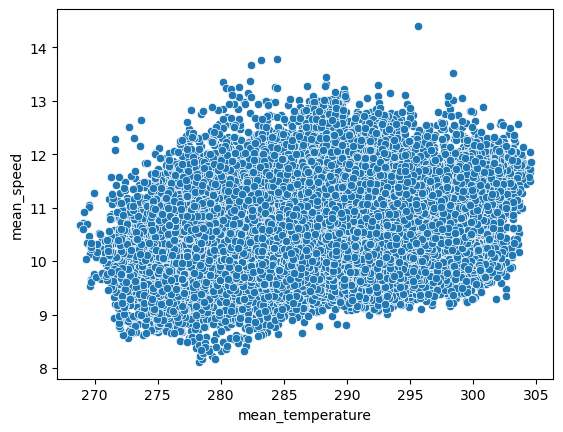

In [162]:
sns.scatterplot(data=df, x="mean_temperature", y="mean_speed")
plt.show()

In [163]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['mean_temperature'], df['mean_speed']
)

print(f'Уравнение линейной регрессии: mean_speed = {slope} * mean_temperature + {intercept}', '\n' , 'R^2:', r_value**2)

Уравнение линейной регрессии: mean_speed = 0.016860860520748748 * mean_temperature + 5.644902725196061 
 R^2: 0.03155037205122539


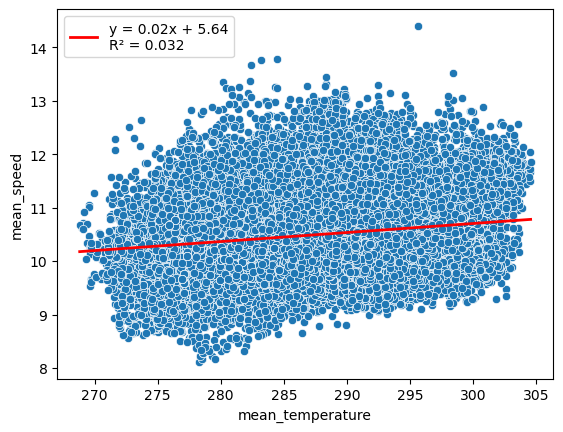

In [164]:
sns.scatterplot(data=df, x="mean_temperature", y="mean_speed") 

x_line = np.linspace(df['mean_temperature'].min(), df['mean_temperature'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}')

plt.legend()
plt.show()

Вывод: В среднем скорость ветра имеет прирост на 0.02 м/с при приросте температуры на 1 кельвин. На основе этого, можно сказать, что вероятность ветреной или ураганной погоды больше при высокой температуре. Но это общяя тенденция, которая не позволит сделать точных прогноз. 

<hr>

<h3>Задание 2. Рассчитайте градиент температуры по координатам (∂T/∂lat, ∂T/∂lon) для каждой точки. Какая польза от этого для прогнозов?</h3>


In [165]:
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,mean_temperature,mean_speed
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0,291.149444,10.031066
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.127045,10.084515
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.148493,10.031040
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.168177,10.004545
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,3.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0,291.187862,9.951023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,...,4.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,290.466500,11.390986
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,...,3.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0,290.520111,11.554598
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,...,2.0,2.0,1.0,1.0,5.0,3.0,3.0,1.0,290.324833,11.414185
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,289.560861,10.907050


In [166]:
mean_temperatures = df.iloc[:, 1:37].mean().reset_index(name='mean_temperature')['mean_temperature'].copy()

In [167]:
df_cities = pd.concat([df_cities, mean_temperatures], axis=1)
df_cities

,City,Country,Latitude,Longitude,mean_temperature
0,Vancouver,Canada,49.249660,-123.119339,283.862440
1,Portland,United States,45.523449,-122.676208,285.050036
2,San Francisco,United States,37.774929,-122.419418,288.156434
3,Seattle,United States,47.606209,-122.332069,284.474086
4,Los Angeles,United States,34.052231,-118.243683,290.841516
5,San Diego,United States,32.715328,-117.157257,290.215275
6,Las Vegas,United States,36.174969,-115.137222,292.476427
7,Phoenix,United States,33.448380,-112.074043,295.532838
8,Albuquerque,United States,35.084492,-106.651138,285.669166
9,Denver,United States,39.739151,-104.984703,282.892186


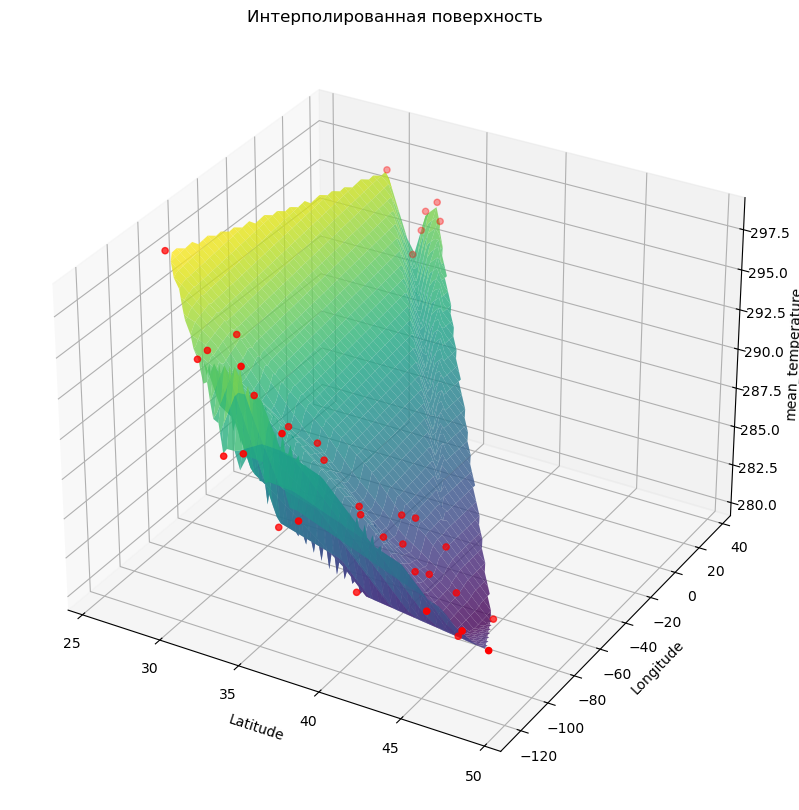

In [176]:
# Создание регулярной сетки
xi = np.linspace(df_cities['Latitude'].min(), df_cities['Latitude'].max(), 100)
yi = np.linspace(df_cities['Longitude'].min(), df_cities['Longitude'].max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Интерполяция на регулярную сетку
ZI = griddata((df_cities['Latitude'], df_cities['Longitude']), df_cities['mean_temperature'], (XI, YI), method='linear')

# Построение поверхности
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XI, YI, ZI, cmap='viridis', alpha=0.8)
ax.scatter(df_cities['Latitude'], df_cities['Longitude'], df_cities['mean_temperature'], color='red', s=20)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('mean_temperature')
ax.set_title('Интерполированная поверхность')
plt.show()

In [177]:
# Вычисляем градиенты на существующей сетке
grad_y, grad_x = np.gradient(ZI, yi, xi)  # grad_x - по Latitude, grad_y - по Longitude

# Теперь для каждой исходной точки находим ближайший узел сетки и берем оттуда градиент
gradients = []
for i, row in df_cities.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    
    # Находим индексы ближайшего узла сетки
    lat_idx = np.argmin(np.abs(xi - lat))
    lon_idx = np.argmin(np.abs(yi - lon))
    
    # Берем градиенты из этого узла
    grad_lat = grad_x[lon_idx, lat_idx]   # производная по широте
    grad_lon = grad_y[lon_idx, lat_idx]   # производная по долготе
    
    gradients.append({
        'grad_latitude': grad_lat,
        'grad_longitude': grad_lon,
        'grad_magnitude': np.sqrt(grad_lat**2 + grad_lon**2),
        'grad_direction_deg': np.degrees(np.arctan2(grad_lat, grad_lon))
    })

# Добавляем к исходному DataFrame
df_cities_with_gradients = pd.concat([df_cities, pd.DataFrame(gradients)], axis=1)
df_cities_with_gradients

,City,Country,Latitude,Longitude,mean_temperature,grad_latitude,grad_longitude,grad_magnitude,grad_direction_deg
0,Vancouver,Canada,49.249660,-123.119339,283.862440,NaN,NaN,NaN,NaN
1,Portland,United States,45.523449,-122.676208,285.050036,NaN,NaN,NaN,NaN
2,San Francisco,United States,37.774929,-122.419418,288.156434,NaN,NaN,NaN,NaN
3,Seattle,United States,47.606209,-122.332069,284.474086,NaN,NaN,NaN,NaN
4,Los Angeles,United States,34.052231,-118.243683,290.841516,2.131026,NaN,NaN,NaN
5,San Diego,United States,32.715328,-117.157257,290.215275,NaN,NaN,NaN,NaN
6,Las Vegas,United States,36.174969,-115.137222,292.476427,-0.632921,-0.140376,0.648301,-102.505207
7,Phoenix,United States,33.448380,-112.074043,295.532838,0.499965,0.020829,0.500399,87.614413
8,Albuquerque,United States,35.084492,-106.651138,285.669166,-2.021614,-0.569962,2.100423,-105.744972
9,Denver,United States,39.739151,-104.984703,282.892186,-1.006605,-0.282254,1.045429,-105.663608
